# Load modules

In [1]:
import sys, os
import ROOT
import numpy as np
import scipy.stats as st
import scipy.interpolate as ip
import matplotlib.style
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
sys.path.insert(2,'./modules')
import pyVisualiser as pyv
%matplotlib inline

Welcome to JupyROOT 6.22/02


# Settings

In [12]:
exposure = 5600*1000
source_names = ["atm","B8","hep","DSN","pp","vvBB","Kr85","Rn222","Rn220","DetER","DetNR"]

#Background expectation values
mu_atm = 0.64
mu_B8 = 38.05
mu_hep = 0.89
mu_DSN = 0.14
mu_pp = 549.36
mu_vvBB = 392.55
mu_Kr85 = 73.97
mu_Rn222 = 1706.61
mu_Rn220 = 280.34
mu_DetER = 151.87
mu_DetNR = 0.51

# Read in data

In [13]:
pdf_folder_path = '../../output/root_pdfs/' #folder path
pdf_folder_name = 'LZ_projected_SI' #folder name with signal and background PDFs

#Signal
input_file = pdf_folder_path + pdf_folder_name + '/All_WIMP.root'
mWimp_GeV = 40
S1_wimp, logS2_wimp = pyv.sample_data_from_TH2(input_file,'h_wimp_m{:.1f}'.format(mWimp_GeV))

#Background
input_file = pdf_folder_path + pdf_folder_name + '/All_BG.root'
n_BG_sources = 11 #[0,11]
for i in xrange(n_BG_sources):
    if i==0:
        histo_name = 'h_' + source_names[i]
        S1_atm, logS2_atm = pyv.sample_data_from_TH2(input_file,histo_name)
    if i==1:
        histo_name = 'h_' + source_names[i]
        S1_B8, logS2_B8 = pyv.sample_data_from_TH2(input_file,histo_name)
    if i==2:
        histo_name = 'h_' + source_names[i]
        S1_hep, logS2_hep = pyv.sample_data_from_TH2(input_file,histo_name)
    if i==3:
        histo_name = 'h_' + source_names[i]
        S1_DSN, logS2_DSN = pyv.sample_data_from_TH2(input_file,histo_name)
    if i==4:
        histo_name = 'h_' + source_names[i]
        S1_pp, logS2_pp = pyv.sample_data_from_TH2(input_file,histo_name)
    if i==5:
        histo_name = 'h_' + source_names[i]
        S1_vvBB, logS2_vvBB = pyv.sample_data_from_TH2(input_file,histo_name)
    if i==6:
        histo_name = 'h_' + source_names[i]
        S1_Kr85, logS2_Kr85 = pyv.sample_data_from_TH2(input_file,histo_name)
    if i==7:
        histo_name = 'h_' + source_names[i]
        S1_Rn222, logS2_Rn222 = pyv.sample_data_from_TH2(input_file,histo_name)
    if i==8:
        histo_name = 'h_' + source_names[i]
        S1_Rn220, logS2_Rn220 = pyv.sample_data_from_TH2(input_file,histo_name)
    if i==9:
        histo_name = 'h_' + source_names[i]
        S1_DetER, logS2_DetER = pyv.sample_data_from_TH2(input_file,histo_name)
    if i==10:
        histo_name = 'h_' + source_names[i]
        S1_DetNR, logS2_DetNR = pyv.sample_data_from_TH2(input_file,histo_name)

# Example plot

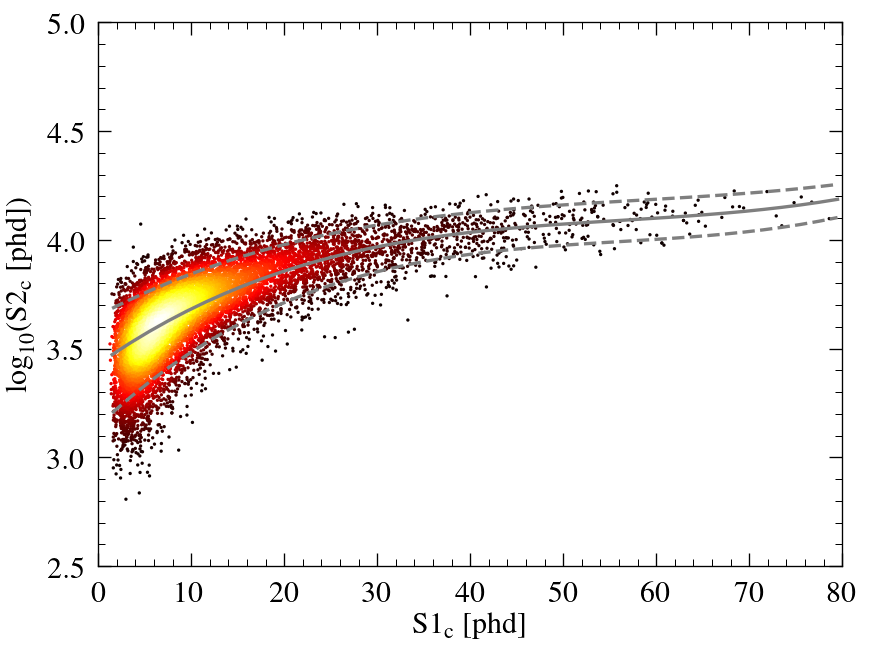

In [15]:
reload(pyv)
nsamples = 1e4
x_min = 0
x_max = 80
y_min = 2.5
y_max = 5
lw = 2
text_size = 18
col = '#7f7f7f'
flag_save_fig = True

S1 = np.copy(S1_wimp)
logS2 = np.copy(logS2_wimp)

plt.figure(dpi=120,figsize=(8,6))
pyv.apply_style_2D(x_max=x_max, y_min=y_min, y_max=y_max, text_size=text_size,\
                     xtick_minor=2,xtick_major=10,ytick_minor=0.1,ytick_major=0.5)

#>> Scatter plot
pyv.scatter_color(S1, logS2, cmap='hot', size=1, nsamples=nsamples)

#>> Percentile lines
smooth_factor=0.1
window=3
step=2
xlim=[x_min+window/2.,x_max]

x_bins, q_y = pyv.find_percentile_line(S1, logS2, w=window, s=step, P=50, xlim=xlim)
x_bins, q_y_10 = pyv.find_percentile_line(S1, logS2, w=window, s=step, P=10, xlim=xlim)
x_bins, q_y_90 = pyv.find_percentile_line(S1, logS2, w=window, s=step, P=90, xlim=xlim)

f_median = pyv.smooth_data(x_bins, q_y, s=smooth_factor) 
f_lower = pyv.smooth_data(x_bins, q_y_10, s=smooth_factor)
f_upper = pyv.smooth_data(x_bins, q_y_90, s=smooth_factor)

plt.plot(x_bins, f_median(x_bins), '-', color=col, linewidth=lw)
plt.plot(x_bins, f_upper(x_bins), '--', color=col, linewidth=lw)
plt.plot(x_bins, f_lower(x_bins), '--', color=col, linewidth=lw)
 
#>>Save figure
if(flag_save_fig):
    plt.savefig('./figs/scatter_S1logS2_single.pdf',bbox_inches='tight')

# Combined Plot

## Prepare data

In [16]:
# Apply S1 cut
S1c_MAX = 80

#atm
S1_atm_cut = S1_atm[S1_atm < S1c_MAX]
logS2_atm_cut = logS2_atm[S1_atm < S1c_MAX]
#B8
S1_B8_cut = S1_B8[S1_B8 < S1c_MAX]
logS2_B8_cut = logS2_B8[S1_B8 < S1c_MAX]
#hep
S1_hep_cut = S1_hep[S1_hep < S1c_MAX]
logS2_hep_cut = logS2_hep[S1_hep < S1c_MAX]
#DSN
S1_DSN_cut = S1_DSN[S1_DSN < S1c_MAX]
logS2_DSN_cut = logS2_DSN[S1_DSN < S1c_MAX]
#pp
S1_pp_cut = S1_pp[S1_pp < S1c_MAX]
logS2_pp_cut = logS2_pp[S1_pp < S1c_MAX]
#vvBB
S1_vvBB_cut = S1_vvBB[S1_vvBB < S1c_MAX]
logS2_vvBB_cut = logS2_vvBB[S1_vvBB < S1c_MAX]
#Kr85
S1_Kr85_cut = S1_Kr85[S1_Kr85 < S1c_MAX]
logS2_Kr85_cut = logS2_Kr85[S1_Kr85 < S1c_MAX]
#Rn222
S1_Rn222_cut = S1_Rn222[S1_Rn222 < S1c_MAX]
logS2_Rn222_cut = logS2_Rn222[S1_Rn222 < S1c_MAX]
#Rn220
S1_Rn220_cut = S1_Rn220[S1_Rn220 < S1c_MAX]
logS2_Rn220_cut = logS2_Rn220[S1_Rn220 < S1c_MAX]
#DetER
S1_DetER_cut = S1_DetER[S1_DetER < S1c_MAX]
logS2_DetER_cut = logS2_DetER[S1_DetER < S1c_MAX]
#DetNR
S1_DetNR_cut = S1_DetNR[S1_DetNR < S1c_MAX]
logS2_DetNR_cut = logS2_DetNR[S1_DetNR < S1c_MAX]

In [17]:
# LZ simulated data set
draw_new_dataset = True
save_dataset = True

if(draw_new_dataset):
    # Draw from individual PDFs
    eS1_atm, elogS2_atm = pyv.draw_random_samples_Poisson(S1_atm_cut, logS2_atm_cut, mu_atm, flag_mean_case=True)
    eS1_B8, elogS2_B8 = pyv.draw_random_samples_Poisson(S1_B8_cut, logS2_B8_cut, mu_B8, flag_mean_case=True)
    eS1_hep, elogS2_hep = pyv.draw_random_samples_Poisson(S1_hep_cut, logS2_hep_cut, mu_hep, flag_mean_case=True)
    eS1_DSN, elogS2_DSN = pyv.draw_random_samples_Poisson(S1_DSN_cut, logS2_DSN_cut, mu_DSN, flag_mean_case=True)
    eS1_pp, elogS2_pp = pyv.draw_random_samples_Poisson(S1_pp_cut, logS2_pp_cut, mu_pp, flag_mean_case=True)
    eS1_vvBB, elogS2_vvBB = pyv.draw_random_samples_Poisson(S1_vvBB_cut, logS2_vvBB_cut, mu_vvBB, flag_mean_case=True)
    eS1_Kr85, elogS2_Kr85 = pyv.draw_random_samples_Poisson(S1_Kr85_cut, logS2_Kr85_cut, mu_Kr85, flag_mean_case=True)
    eS1_Rn222, elogS2_Rn222 = pyv.draw_random_samples_Poisson(S1_Rn222_cut, logS2_Rn222_cut, mu_Rn222, flag_mean_case=True)
    eS1_Rn220, elogS2_Rn220 = pyv.draw_random_samples_Poisson(S1_Rn220_cut, logS2_Rn220_cut, mu_Rn220, flag_mean_case=True)
    eS1_DetER, elogS2_DetER = pyv.draw_random_samples_Poisson(S1_DetER_cut, logS2_DetER_cut, mu_DetER, flag_mean_case=True)
    eS1_DetNR, elogS2_DetNR = pyv.draw_random_samples_Poisson(S1_DetNR_cut, logS2_DetNR_cut, mu_DetNR, flag_mean_case=True)
 
print '>> LZ simulated data set'
print 'ER: eN_pp={}, eN_vvBB={}, eN_Kr85={}, eN_Rn222={}, eN_R220={}, eN_DetER={}'.format(len(eS1_pp),len(eS1_vvBB),len(eS1_Kr85),len(eS1_Rn222),len(eS1_Rn220),len(eS1_DetER))
print 'NR: eN_atm = {}, eN_B8 = {}, eN_hep = {}, eN_DSN = {}, eN_DetNR = {}'.format(len(eS1_atm),len(eS1_B8),\
                                                                          len(eS1_hep),len(eS1_DSN),\
                                                                          len(eS1_DetNR))
if (save_dataset):
    S1_txt=np.hstack((eS1_atm,eS1_B8,eS1_hep,eS1_DSN,eS1_pp,eS1_vvBB,eS1_Kr85,eS1_Rn222,eS1_Rn220,eS1_DetER,eS1_DetNR))
    logS2_txt=np.hstack((elogS2_atm,elogS2_B8,elogS2_hep,elogS2_DSN,elogS2_pp,elogS2_vvBB,elogS2_Kr85,elogS2_Rn222,elogS2_Rn220,elogS2_DetER,elogS2_DetNR))
    data_txt = np.column_stack((S1_txt,logS2_txt))
    np.savetxt('./data/simulated_lz_dataset.txt',data_txt)

>> LZ simulated data set
ER: eN_pp=549, eN_vvBB=392, eN_Kr85=73, eN_Rn222=1706, eN_R220=280, eN_DetER=151
NR: eN_atm = 0, eN_B8 = 38, eN_hep = 0, eN_DSN = 0, eN_DetNR = 0


## Plot all elements

In [18]:
reload(pyv)

#>> Plotting options
nsamples_kde=1e4
text_size=20
lw=2 #linewidth
mk='.' #marker options
mk_col='k'
mk_size=9
mk_alpha=0.75
x_min=0; x_max=80
y_min=2.5; y_max=5

# >> Isocontour lines
col_iso='C7'
txt_iso=11
#g1=0.075;g2=83.44 #NEST v1 - TDR era
#g1=0.118735;g2=83.44 #NEST v1
g1=0.118735;g2=79.2291 #NEST v2
S1_iso = np.linspace(1,x_max,100)
Er_nr_iso = [6,12,18,24,30,36,42,48]
# NEST v2
a_nest = 12.6
b_nest = 1.05

#>> Flags
flag_draw_contours = True
flag_draw_datapoints = True
flag_draw_isoenergy_lines = True
flag_save_figs = True

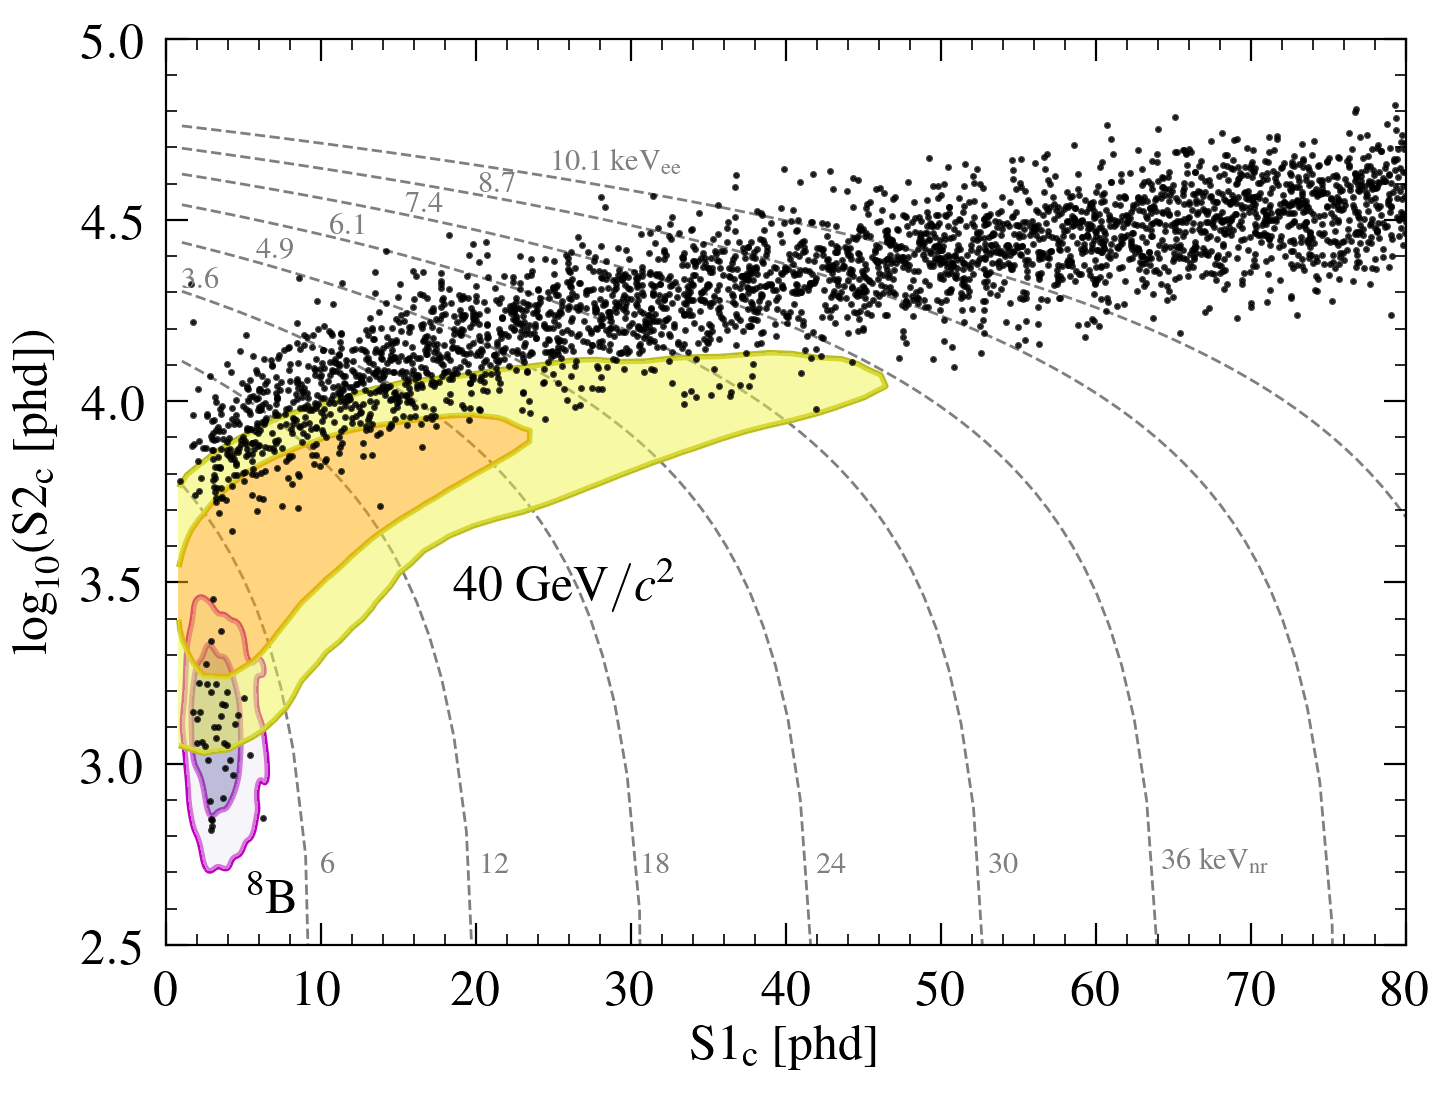

In [19]:
#>> Main figure

fig = plt.figure(dpi=200,figsize=(8,6))
pyv.apply_style_2D(x_max=x_max, y_min=y_min, y_max=y_max, text_size=text_size,\
                   xtick_minor=2,xtick_major=10,ytick_minor=0.1,ytick_major=0.5)
    
# >> Density contours
if(flag_draw_contours):
    zo=2
    # WIMP mass contour
    pyv.pdf_contour(S1_wimp, logS2_wimp,nsig=2,nsamples=nsamples_kde,lw=lw,\
                        fill=True,fill_alpha=0.5,color='C8',colormap=plt.cm.Wistia,bins=50,label=False,zorder=zo+1)
    plt.text(18.5,3.45,r'$\mathrm{40\ GeV}/c^2$',fontsize=text_size-2,color='k',zorder=zo+3)
    # options: fontweight='bold'
    # B8-only contour
    pyv.pdf_contour(S1_B8, logS2_B8,nsig=2,nsamples=nsamples_kde,lw=lw,\
                        fill=True,fill_alpha=0.5,color='m',colormap=plt.cm.Purples,bins=100,label=False, zorder=zo)
    plt.text(5.25,2.59,r'$\mathrm{^8B}$',fontsize=text_size-2,color='k',zorder=zo+3)
    
# >> Simulated data set
if(flag_draw_datapoints):
    zo=3
    # Events in NR band
    plt.scatter(eS1_atm, elogS2_atm, marker=mk,c=mk_col,s=mk_size,alpha=mk_alpha, zorder=zo)
    plt.scatter(eS1_DSN, elogS2_DSN, marker=mk,c=mk_col,s=mk_size,alpha=mk_alpha, zorder=zo)
    plt.scatter(eS1_DetNR, elogS2_DetNR, marker=mk,c=mk_col,s=mk_size,alpha=mk_alpha, zorder=zo)
    # Events in NR contour
    plt.scatter(eS1_B8, elogS2_B8, marker=mk,c=mk_col,s=mk_size,alpha=mk_alpha, zorder=zo)
    plt.scatter(eS1_hep, elogS2_hep, marker=mk,c=mk_col,s=mk_size,alpha=mk_alpha, zorder=zo)
    # Events in ER band
    plt.scatter(eS1_pp, elogS2_pp, marker=mk,c=mk_col,s=mk_size,alpha=mk_alpha, zorder=zo)
    plt.scatter(eS1_vvBB, elogS2_vvBB, marker=mk,c=mk_col,s=mk_size,alpha=mk_alpha, zorder=zo)
    plt.scatter(eS1_Kr85, elogS2_Kr85, marker=mk,c=mk_col,s=mk_size,alpha=mk_alpha, zorder=zo)
    plt.scatter(eS1_Rn222, elogS2_Rn222, marker=mk,c=mk_col,s=mk_size,alpha=mk_alpha, zorder=zo)
    plt.scatter(eS1_Rn220, elogS2_Rn220, marker=mk,c=mk_col,s=mk_size,alpha=mk_alpha, zorder=zo)
    plt.scatter(eS1_DetER, elogS2_DetER, marker=mk,c=mk_col,s=mk_size,alpha=mk_alpha, zorder=zo)

# >> Isocontour energy lines 
if (flag_draw_isoenergy_lines):
    zo=0
    flag_ER_started = True
    for keVnr in Er_nr_iso:
        S2_iso = pyv.get_energy_isocontour(S1_iso,keVnr=keVnr,g1=g1,g2=g2,a=a_nest,b=b_nest)
        S2_iso[S2_iso<0] = 1. #set negative values to 1 to avoid numerical errors with logarithm
        plt.plot(S1_iso,np.log10(S2_iso),'--',color=col_iso,lw=1,zorder=zo)
        
        #NR labels
        nr_limit=-3
        if keVnr<=Er_nr_iso[nr_limit]: #remove labels from last lines
            index_NR=int(np.where(np.log10(S2_iso)<=3.0)[0][0])
            xpos=S1_iso[index_NR]+1
            ypos=2.7
            if keVnr == Er_nr_iso[nr_limit]:
                # add keVnr at the end of the last printed number
                plt.text(xpos,ypos,'{:.0f} '.format(keVnr)+r'$\mathrm{keV_{nr}}$',fontsize=txt_iso,color=col_iso)
            else:
                # otherwise just print the number
                plt.text(xpos,ypos,str(keVnr),fontsize=txt_iso,color=col_iso)
        
        #ER labels
        er_limit=-1
        if keVnr>Er_nr_iso[1]: #exclude first lines
            if flag_ER_started==True:
                #for the first line
                index_ER = int(np.where(np.log10(S2_iso)>=4.0)[0][0])
                flag_ER_started = False
            else:
                # shift the x position by an arbitrary number for the next lines
                index_ER += 6
                        
            xpos_ER=S1_iso[index_ER]
            ypos_ER=np.log10(S2_iso[index_ER])+0.01
            keVee = (a_nest/73.)*np.power(keVnr,b_nest)
            if keVnr == Er_nr_iso[er_limit]:
                plt.text(xpos_ER,ypos_ER,'{:.1f} '.format(keVee)+r'$\mathrm{keV_{ee}}$',fontsize=txt_iso,color=col_iso)
            else:
                plt.text(xpos_ER,ypos_ER,'{:.1f}'.format(keVee),fontsize=txt_iso,color=col_iso)                

# >> Save figure
if(flag_save_figs):
    fig.savefig('./figs/scatter_S1logS2_combined.pdf',bbox_inches='tight')

# Testing area

## Percentiles

544113

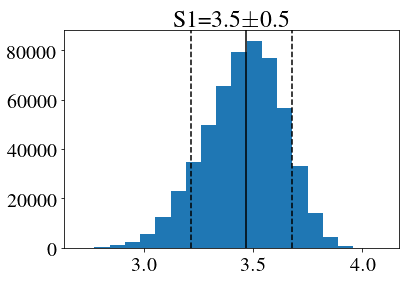

In [22]:
reload(pyv)
x_idx=2
w=0.5
x_bins, q_y, y_vals = pyv.find_percentile_line(S1_wimp,logS2_wimp,w=w,s=1,P=50,xlim=[1.5,50],verbose=True,x_idx=x_idx)
x_bins, q_y_10, y_vals_10 = pyv.find_percentile_line(S1_wimp,logS2_wimp,w=w,s=1,P=10,xlim=[1.5,50],verbose=True,x_idx=x_idx)
x_bins, q_y_90, y_vals_90 = pyv.find_percentile_line(S1_wimp,logS2_wimp,w=w,s=1,P=90,xlim=[1.5,50],verbose=True,x_idx=x_idx)
plt.hist(y_vals,bins=20)
plt.title(r'S1={}$\pm${}'.format(x_bins[x_idx],w))
plt.axvline(x=q_y[x_idx],color='k')
plt.axvline(x=q_y_10[x_idx],color='k',ls='--')
plt.axvline(x=q_y_90[x_idx],color='k',ls='--')
len(y_vals)

## Counting function

In [26]:
reload(pyv)
eS1_ER=np.hstack((eS1_pp,eS1_vvBB,eS1_Kr85,eS1_Rn222,eS1_Rn220,eS1_DetER))
eS2_ER=np.hstack((elogS2_pp,elogS2_vvBB,elogS2_Kr85,elogS2_Rn222,elogS2_Rn220,elogS2_DetER))
C = pyv.get_counts_before_isocontour_energy_line(eS1_ER,eS2_ER,Emin_cut=1.5,Emax_cut=6.5)
print C

1717
